In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_edges': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 '_errors': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[1.975 ± 0.804   1.565 ± 0.411   1.519 ± 0.199   1.390 ± 0.138
 1.495 ± 0.124   1.611 ± 0.126   1.352 ± 0.147   1.553 ± 0.219
 1.589 ± 0.393     nan ±  nan]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[3.000 ± 1.732   3.000 ± 1.732   5.000 ± 2.236   5.000 ± 2.236
 8.000 ± 2.828   14.000 ± 3.742   22.000 ± 4.690   31.000 ± 5.568
 39.000 ± 6.245   44.000 ± 6.633   47.000 ± 6.856   60.000 ± 7.746
 52.000 ± 7.211   74.000 ± 8.602   95.000 ± 9.747   94.000 ± 9.695
 81.000 ± 9.000   80.000 ± 8.944   46.000 ± 6.782   48.000 ± 6.928
 31.000 ± 5.568   37.000 ± 6.083   26.000 ± 5.099   19.000 ± 4.359
 11.000 ± 3.317   12.000 ± 3.464   7.000 ± 2.646   2.000 ± 1.414
 0.000 ± 0.000   4.000 ± 2.000]

Or, just explicitly plot it with matplotlib.

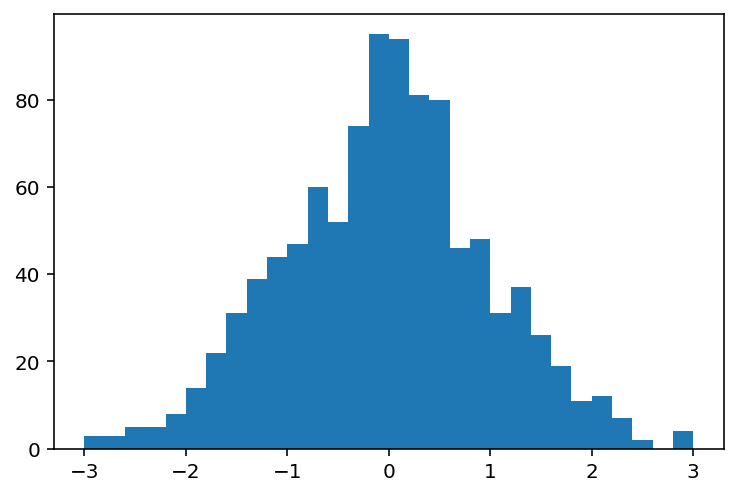

In [6]:
num.plot()

Change the style and show bin counts with some more options.

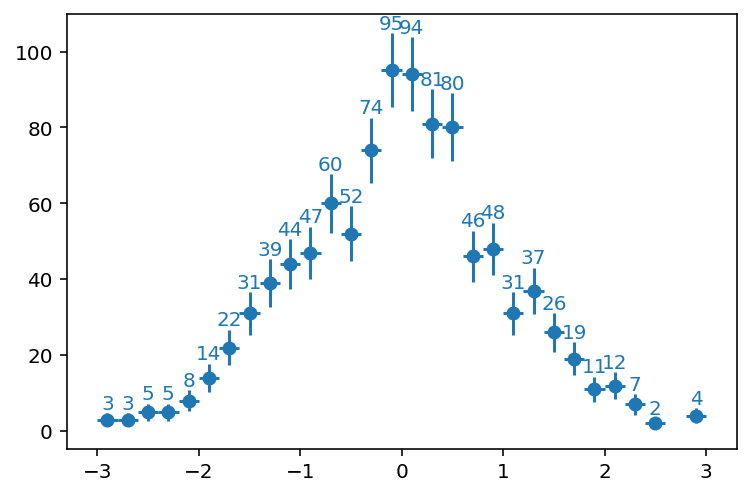

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[3.950 ± 1.609   3.129 ± 0.821   3.038 ± 0.398   2.781 ± 0.275
 2.991 ± 0.248   3.222 ± 0.252   2.703 ± 0.295   3.106 ± 0.439
 3.178 ± 0.785     nan ±  nan]

Make a more complicated plot with a ratio panel.

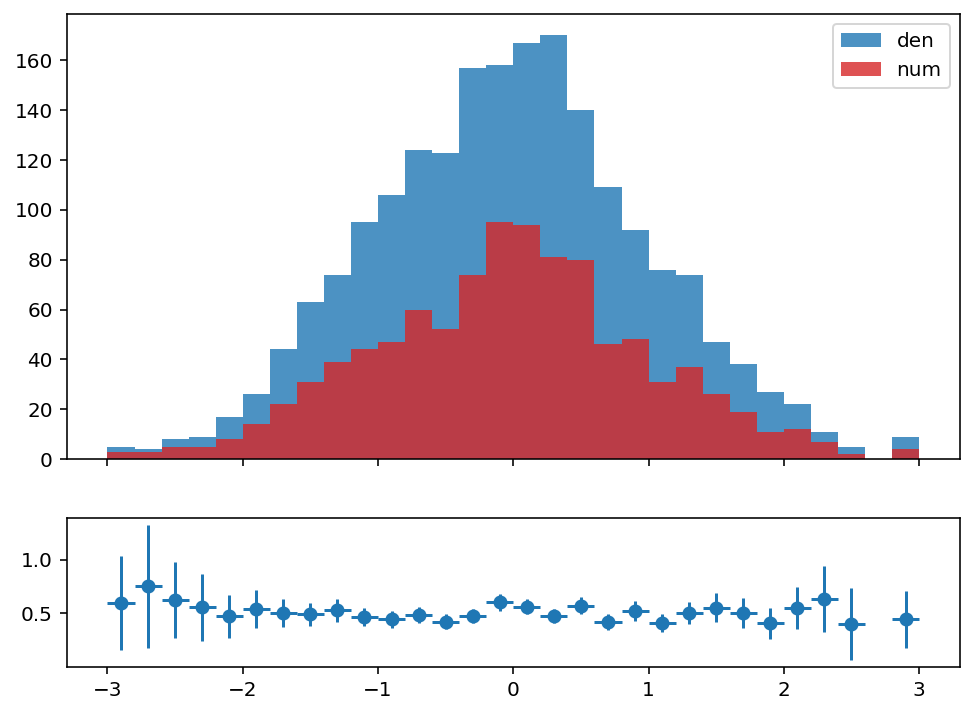

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True)
ax1.legend()

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [3.0, 3.0, 5.0, 5.0, 8.0, 14.0, 22.0, 31.0, 39.0, 44.0, 47.0, 60.0, 52.0, 74.0, 95.0, 94.0, 81.0, 80.0, 46.0, 48.0, 31.0, 37.0, 26.0, 19.0, 11.0, 12.0, 7.0, 2.0, 0.0, 4.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.7320508075688772, 1.7320508075688772, 2.23606797749979, 2.23606797749979, 2.8284271247461903, 3.7416573867739413, 4.69041575982343, 5.5677643628300215, 6.244997998398398, 6.6332495807108, 6.855654600401044, 7.745966692414834, 7.211102550927978, 8.602325267042627, 9.746794344808963, 9.695359714832659, 9.0, 8.94427190999916, 6.782329983125268, 6.92820323027550

In [11]:
Hist1D.from_json(num.to_json())

[3.000 ± 1.732   3.000 ± 1.732   5.000 ± 2.236   5.000 ± 2.236
 8.000 ± 2.828   14.000 ± 3.742   22.000 ± 4.690   31.000 ± 5.568
 39.000 ± 6.245   44.000 ± 6.633   47.000 ± 6.856   60.000 ± 7.746
 52.000 ± 7.211   74.000 ± 8.602   95.000 ± 9.747   94.000 ± 9.695
 81.000 ± 9.000   80.000 ± 8.944   46.000 ± 6.782   48.000 ± 6.928
 31.000 ± 5.568   37.000 ± 6.083   26.000 ± 5.099   19.000 ± 4.359
 11.000 ± 3.317   12.000 ± 3.464   7.000 ± 2.646   2.000 ± 1.414
 0.000 ± 0.000   4.000 ± 2.000]

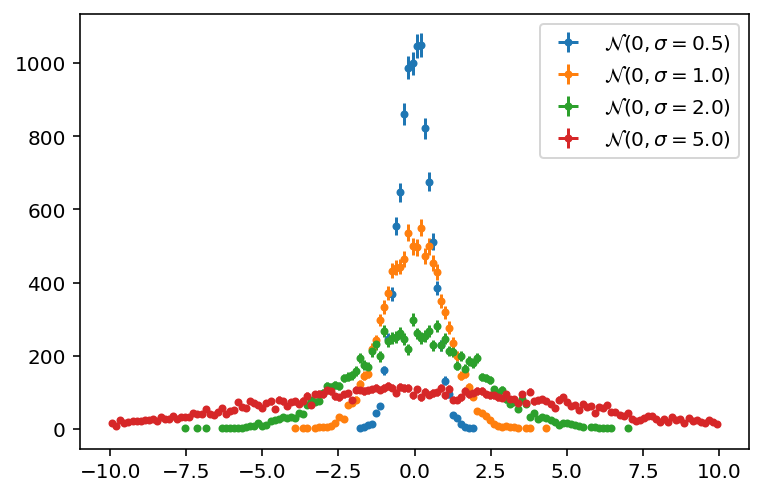

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0).legend() for sigma in [0.5,1,2,5]
];

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [13]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   1.000 ± 1.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   1.000 ± 1.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]


Similar to the 1D object, the HTML representation for 2D histograms has a simplified plot but without explicit bin counts. Instead, if the number of bins is not too large, you can hover over the output and see values at the bottom. To keep it simple, only SVG and CSS code is used--no JS.

In [14]:
h

[[0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   1.000 ± 1.000   ...   0.000 ± 0.000
  0.000 ± 0.000   1.000 ± 1.000]
 ...
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   1.000 ± 1.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]
 [0.000 ± 0.000   0.000 ± 0.000   0.000 ± 0.000   ...   0.000 ± 0.000
  0.000 ± 0.000   0.000 ± 0.000]]

Or just plot it with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

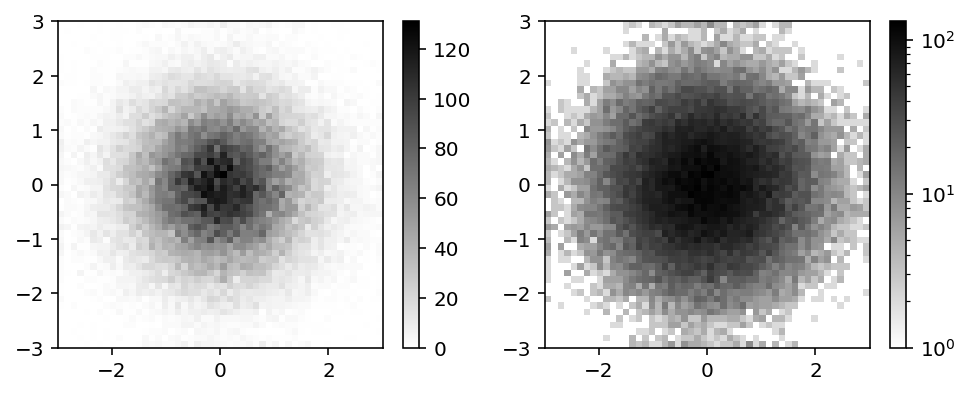

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="binary")
h.plot(ax=ax2, cmap="binary", logz=True)

Chain a few methods together. `x_projection` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

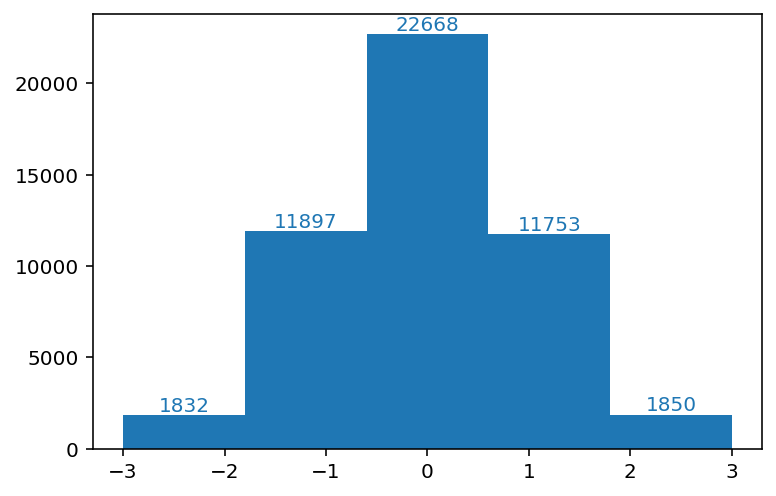

In [16]:
h.rebin(10).x_projection().plot(show_counts=True)

`x_profile` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

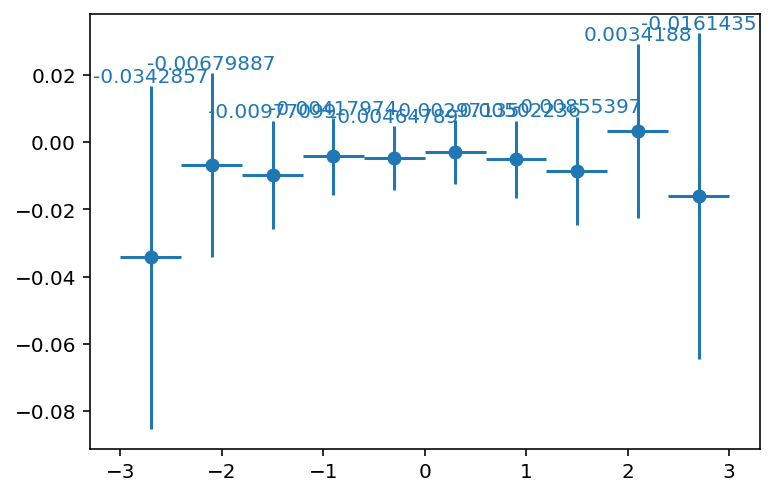

In [17]:
h.rebin(5).x_profile().plot(show_counts=True,show_errors=True)